Projemizin amacımı sağlık sektöründeki verimi,maliyeti ve tıbbi açıdan gelişimi hastahane ve sigorta şirkelerine yardımcı olmak amacıyla göstermektir.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
data1 = pd.read_csv("healthcare_dataset.csv")

data1

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.76,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.09,321,Elective,2019-05-31,Ibuprofen,Abnormal


Bu datasetini seçmemin amacı görüldüğü üzere verilerin detaylı ve yeterli miktarda olması ve rahatlıkla veriler üzerinde işlem yapabilecek olmamadır

In [ ]:
data1.drop(columns=["Name","Blood Type","Date of Admission","Discharge Date","Room Number","Doctor","Insurance Provider","Hospital","Billing Amount"],inplace = True)

data1

,Age,Gender,Medical Condition,Admission Type,Medication,Test Results
0,30,Male,Cancer,Urgent,Paracetamol,Normal
1,62,Male,Obesity,Emergency,Ibuprofen,Inconclusive
2,76,Female,Obesity,Emergency,Aspirin,Normal
3,28,Female,Diabetes,Elective,Ibuprofen,Abnormal
4,43,Female,Cancer,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...
55495,42,Female,Asthma,Elective,Penicillin,Abnormal
55496,61,Female,Obesity,Elective,Aspirin,Normal
55497,38,Female,Hypertension,Urgent,Ibuprofen,Abnormal
55498,43,Male,Arthritis,Elective,Ibuprofen,Abnormal


Veri analizi sırasında daha çok hastaların yaş,cinsiyet bakımından hangi hastalıkla tedaviye verdikleri cevapları araştırmaya çalıştım.

In [ ]:

def check_data1(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_data1(data1)

##################### Shape #####################
(55500, 6)

##################### Columns #####################
Index(['Age', 'Gender', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results'], dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                55500 non-null  int64 
 1   Gender             55500 non-null  object
 2   Medical Condition  55500 non-null  object
 3   Admission Type     55500 non-null  object
 4   Medication         55500 non-null  object
 5   Test Results       55500 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB
##################### Types #####################
Age                   int64
Gender               object
Medical Condition    object
Admission Type       object
Medication           object
Te

In [ ]:
data1.describe()

,Age
count,55500.00
mean,51.54
std,19.60
min,13.00
25%,35.00
50%,52.00
75%,68.00
max,89.00


Hastaların yaş bakımından büyük çoğunluğunun 52 yaş ve üstü kişiler olduğu görülmektedir. Genç hasta sayısı fazla olmasada vardır.

In [ ]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(data1)


##################### Categoric #####################
['Gender', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']

##################### Numeric #####################
['Age']

##################### Categoric But Cardinal #####################
[]

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 55500
Variables: 6
cat_cols: 5
num_cols: 1
cat_but_car: 0
num_but_cat: 0


Veriler içeisinde categoric değişkenler en fazladır. Categoric ve Numarik,Categoric ve Kardinal değişkenler ise yoktur. Numeric sadece bir değere vardır.

        Gender  Ratio
Gender               
Male     27774  50.04
Female   27726  49.96


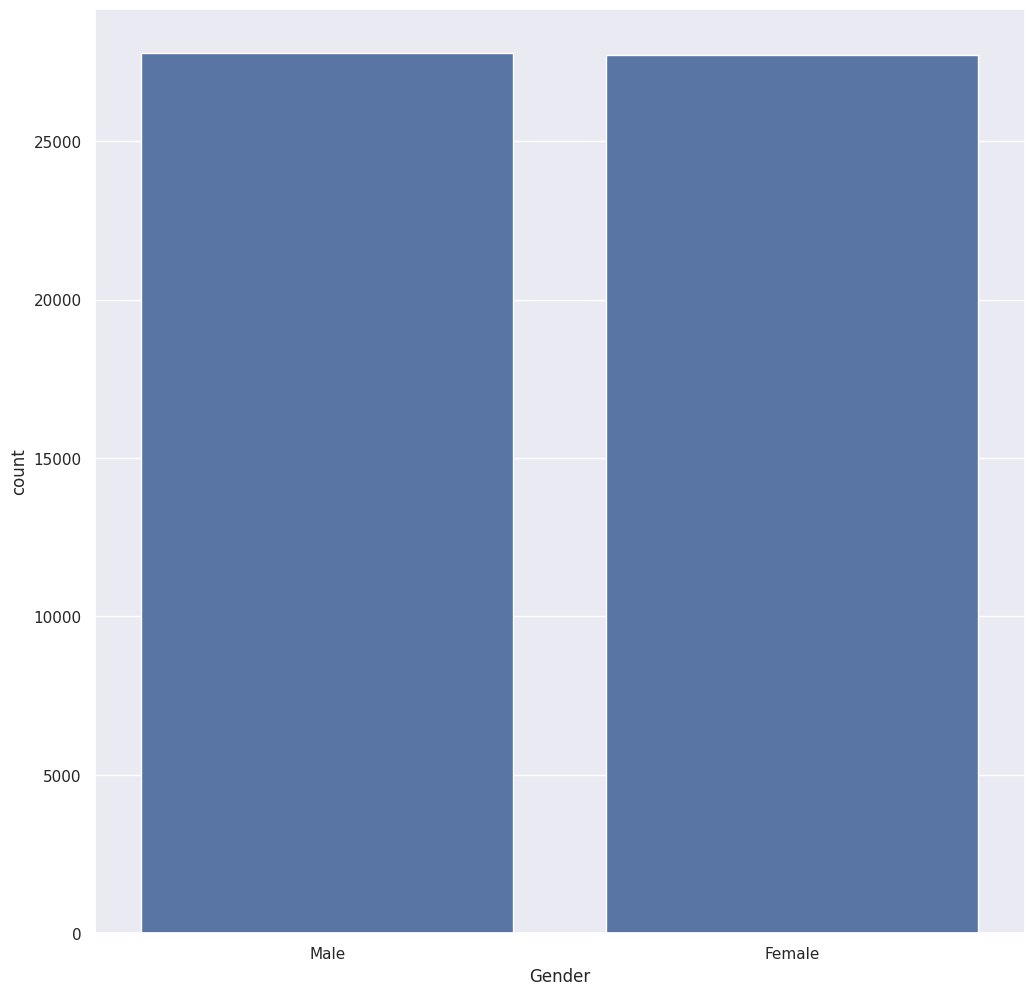

                   Medical Condition  Ratio
Medical Condition                          
Arthritis                       9308  16.77
Diabetes                        9304  16.76
Hypertension                    9245  16.66
Obesity                         9231  16.63
Cancer                          9227  16.63
Asthma                          9185  16.55


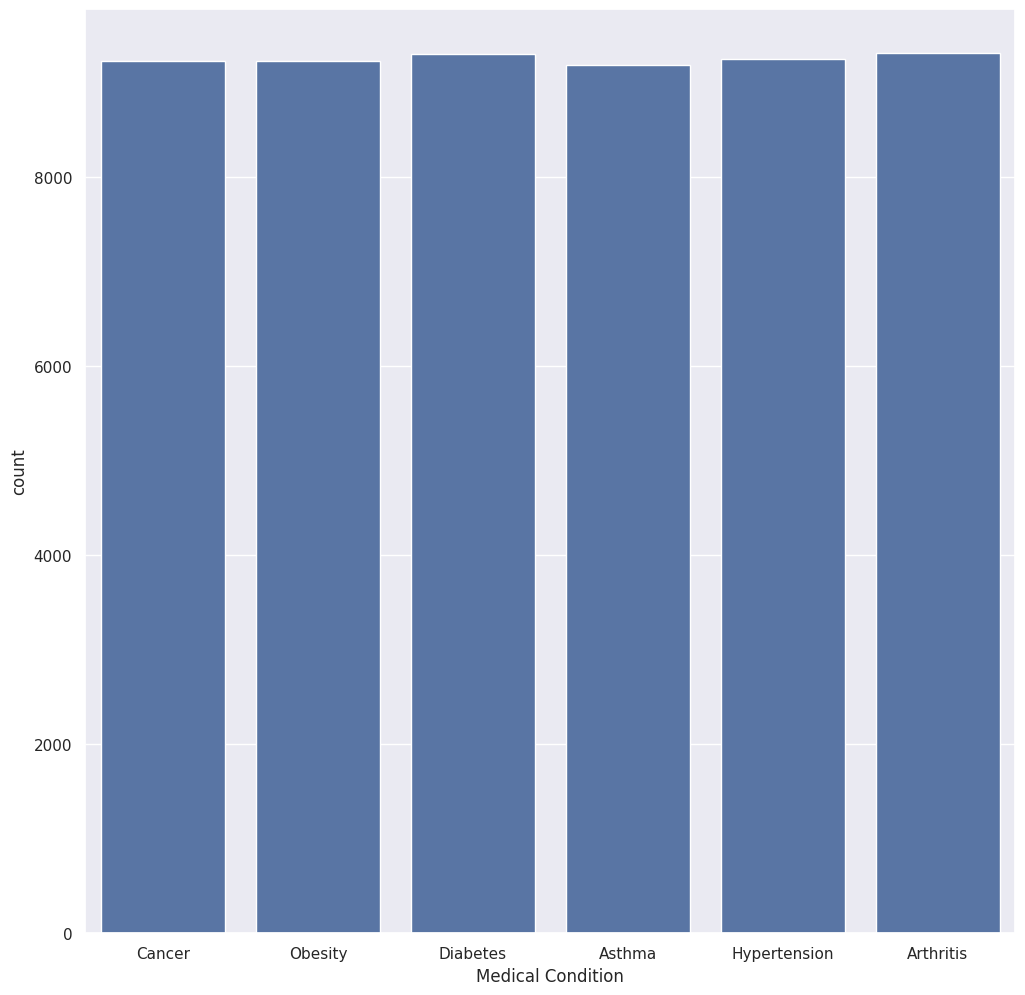

                Admission Type  Ratio
Admission Type                       
Elective                 18655  33.61
Urgent                   18576  33.47
Emergency                18269  32.92


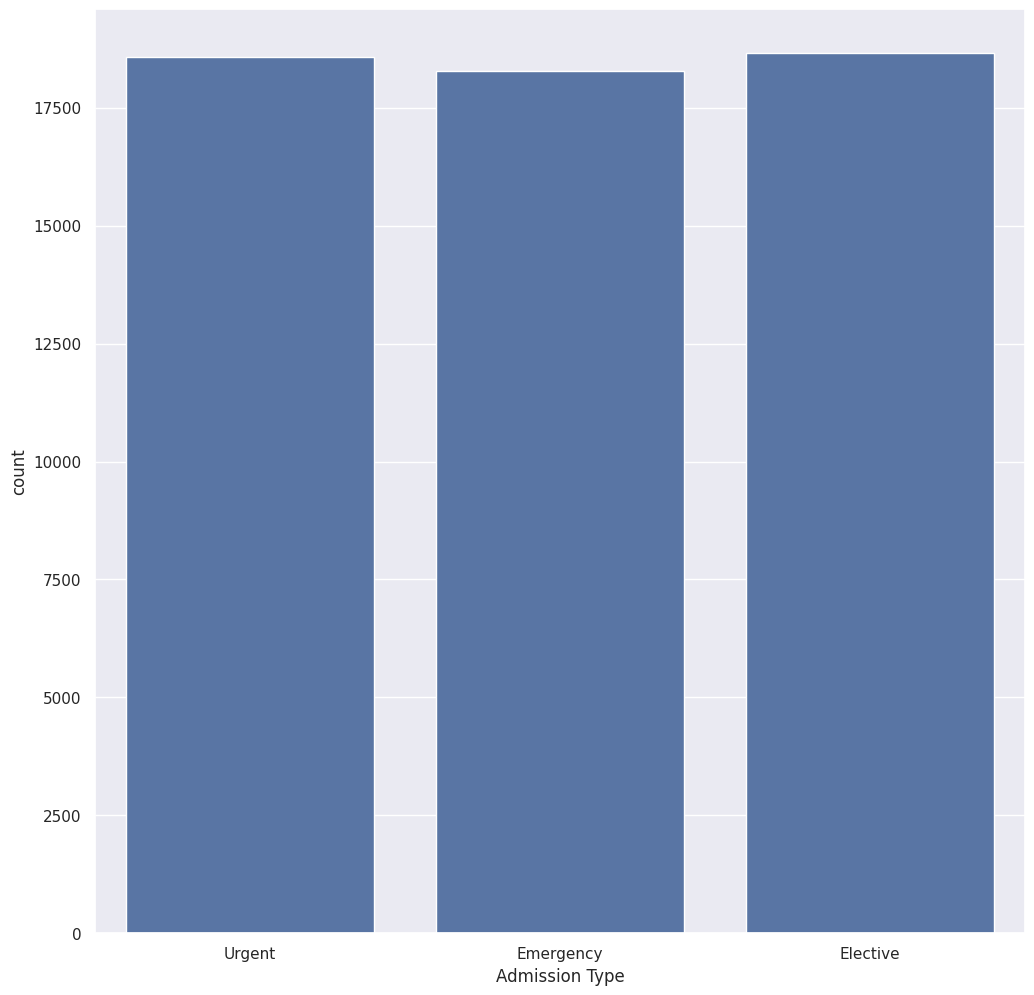

             Medication  Ratio
Medication                    
Lipitor           11140  20.07
Ibuprofen         11127  20.05
Aspirin           11094  19.99
Paracetamol       11071  19.95
Penicillin        11068  19.94


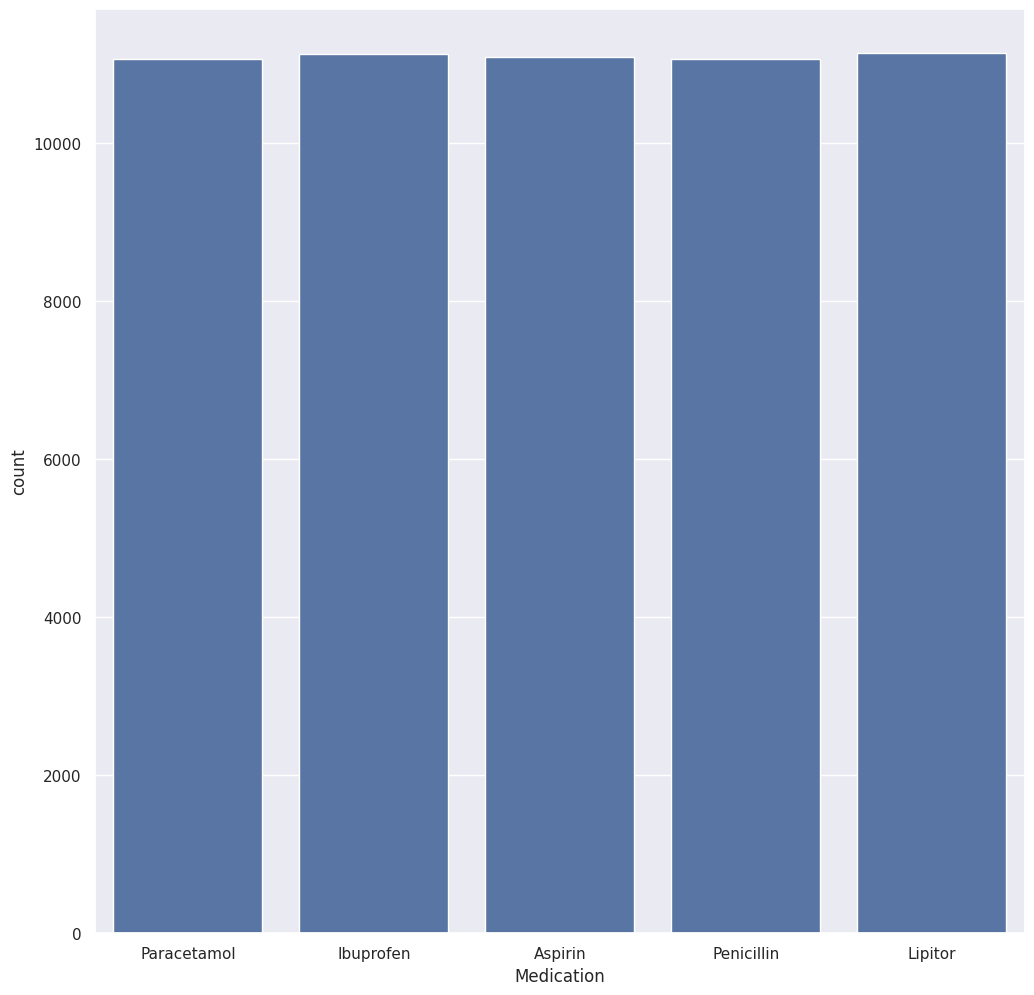

              Test Results  Ratio
Test Results                     
Abnormal             18627  33.56
Normal               18517  33.36
Inconclusive         18356  33.07


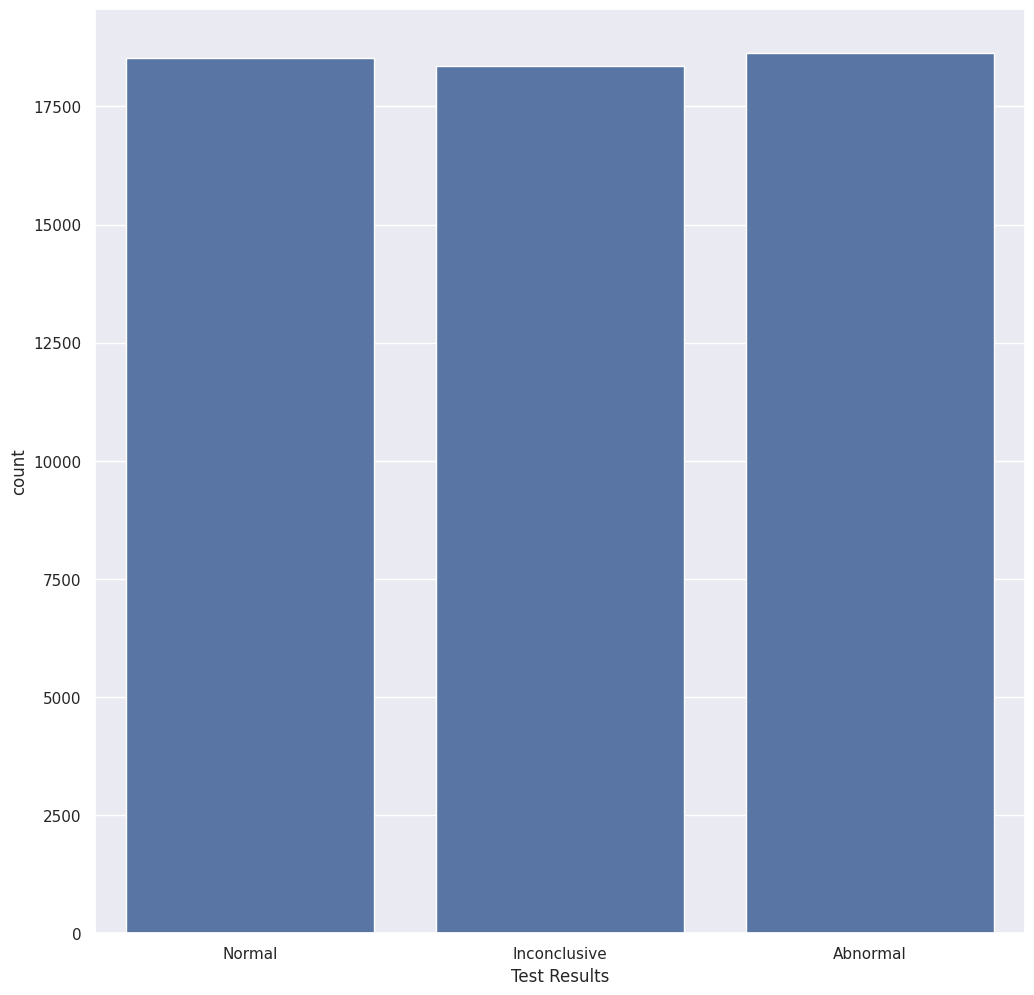

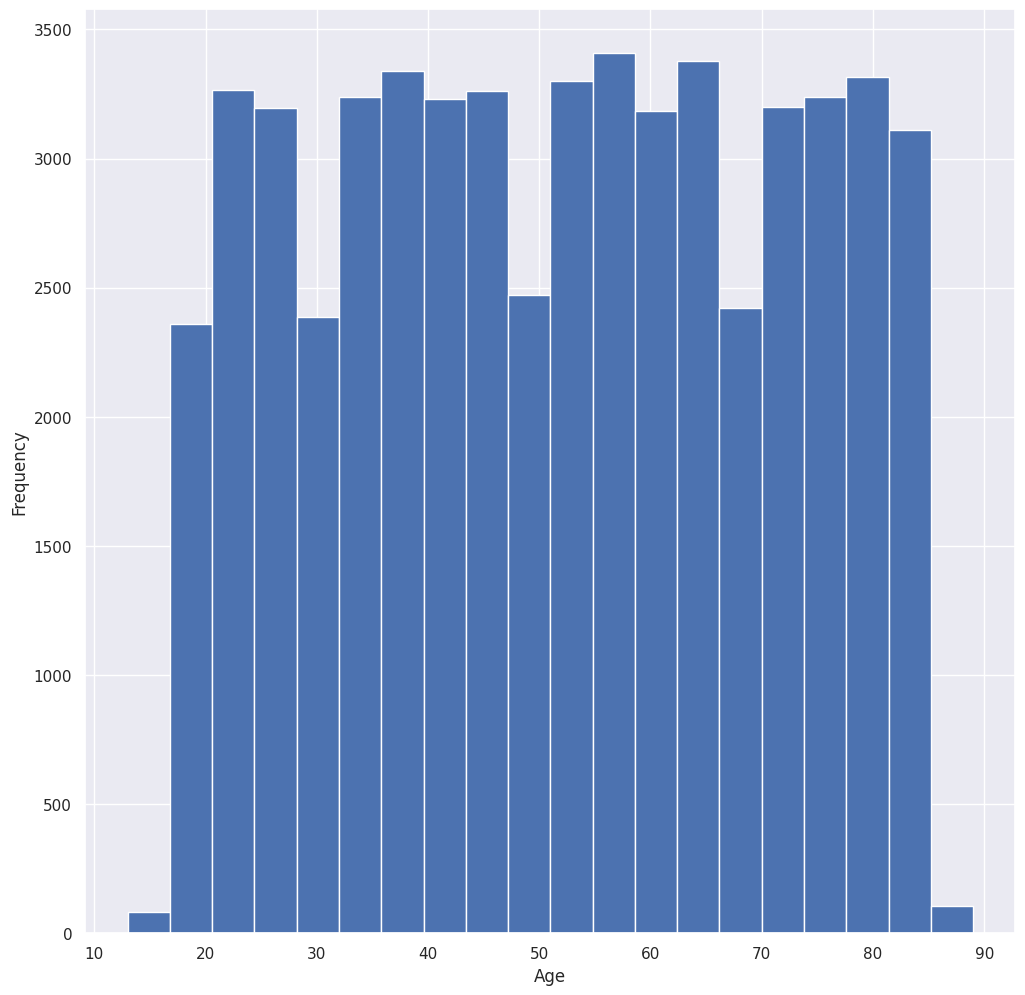

In [ ]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(data1, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(data1, num_col)

Birinci tablo yaş oranlarını göstermektedir.

İkinci tabloda hastalık oranları genel itibariyle birlerine yakındır. En çok görülen hastalık ortapedik bir hastalık olan artritdir. En az ise Astımdır.

Üçüncü tabloda hastalar yapılan ilk müdahale oranları belirtilmiştir.

Dördüncü tabloda verilen ilaçların oranları gösterilmektedir.

Beşinci ve son tabolda ise tedavi oranları ve tedaviye verilen cevapların yaşlara göre aralıkları gösterilmiştir.

In [ ]:
data1.head(3)

,Age,Gender,Medical Condition,Admission Type,Medication,Test Results
0,30,Male,Cancer,Urgent,Paracetamol,Normal
1,62,Male,Obesity,Emergency,Ibuprofen,Inconclusive
2,76,Female,Obesity,Emergency,Aspirin,Normal


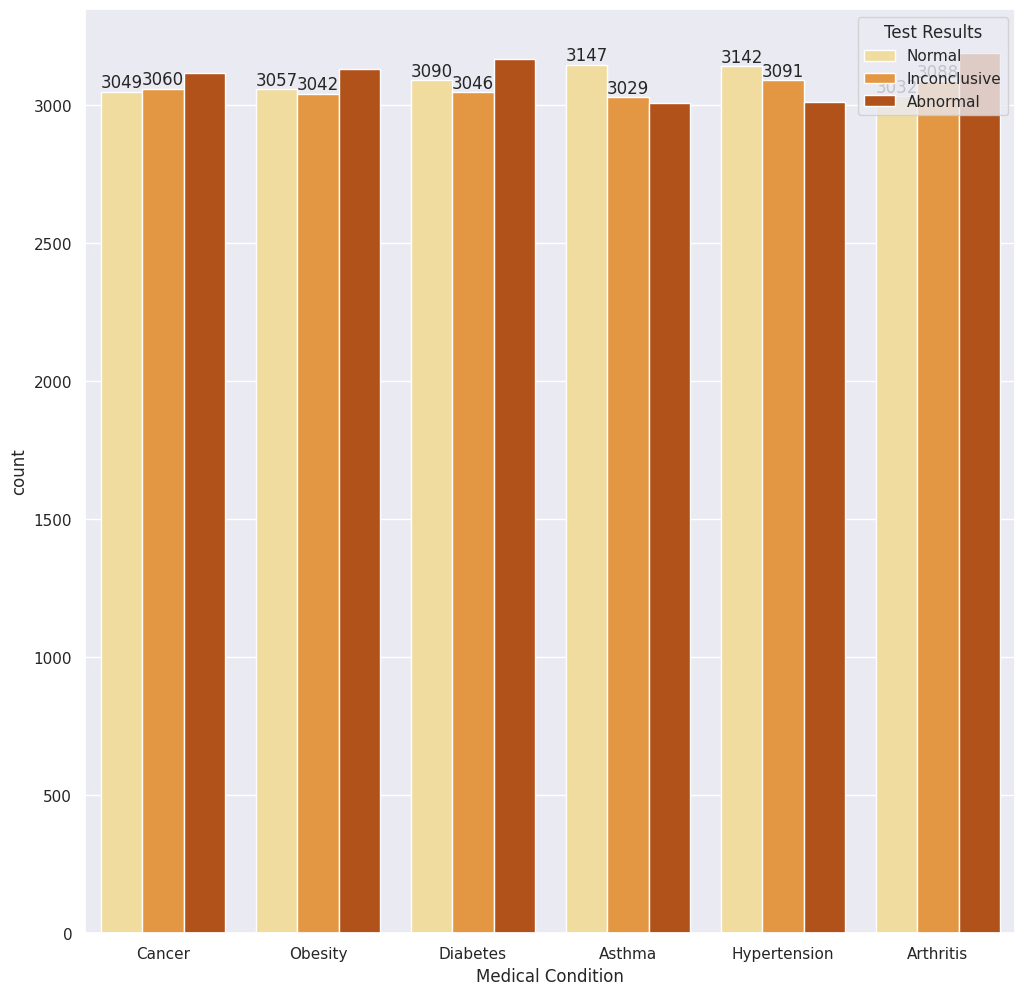

In [ ]:
c = sns.countplot(x = "Medical Condition", data = data1, hue = "Test Results", palette = "YlOrBr")
c.bar_label(c.containers[0])
c.bar_label(c.containers[1])
plt.show()

Hipertansiyon hastalarındaki tedavi başarı oranın ne kadar başarılı olduğunu bu tabloda görebilirsiniz. Ancak artrit hastalarına verilen tedavi yeterince olumlu olmamıştır. Obesite ve diyabet tedavisinde ise sonuçlar yetersizdir.

In [ ]:
data1.isnull().sum()

Age                  0
Gender               0
Medical Condition    0
Admission Type       0
Medication           0
Test Results         0
dtype: int64